<a href="https://colab.research.google.com/github/abhiniveshg0-max/24ADI003-24BAD001/blob/main/Scenario_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we'll install `kagglehub` if it's not already installed and then download the dataset. Next, we'll use the path returned by `kagglehub` to load the `data.csv` file into a pandas DataFrame. Finally, we'll execute your data cleaning, transformation, and plotting steps.

Abhinivesh G - 24BAD001
Using Colab cache for faster access to the 'ecommerce-data' dataset.
Path to dataset files: /kaggle/input/ecommerce-data
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 

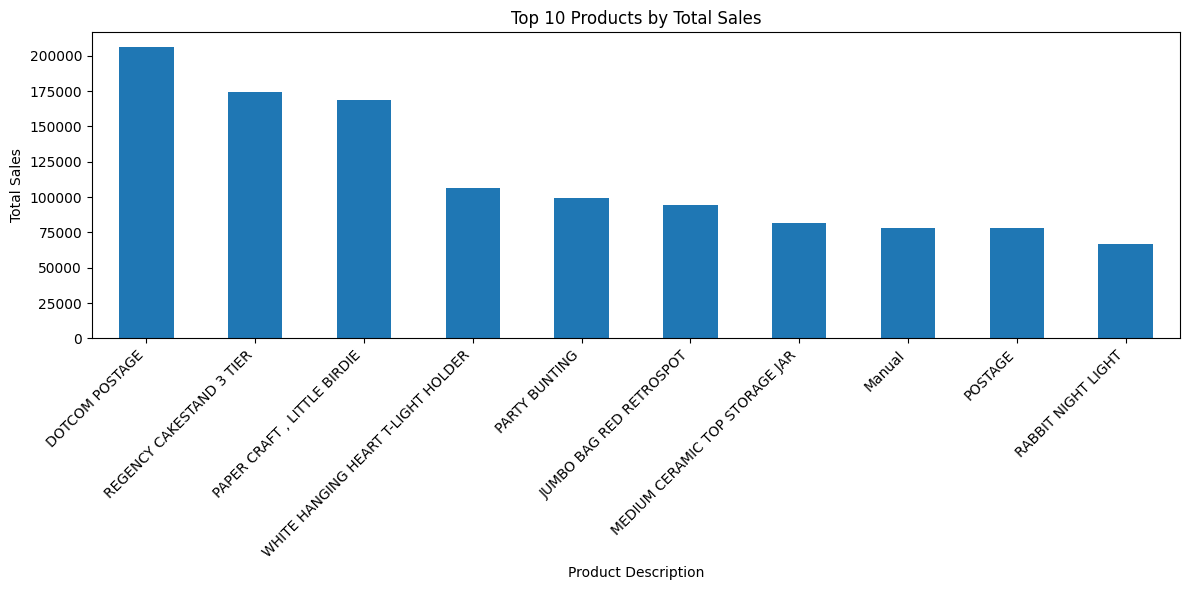

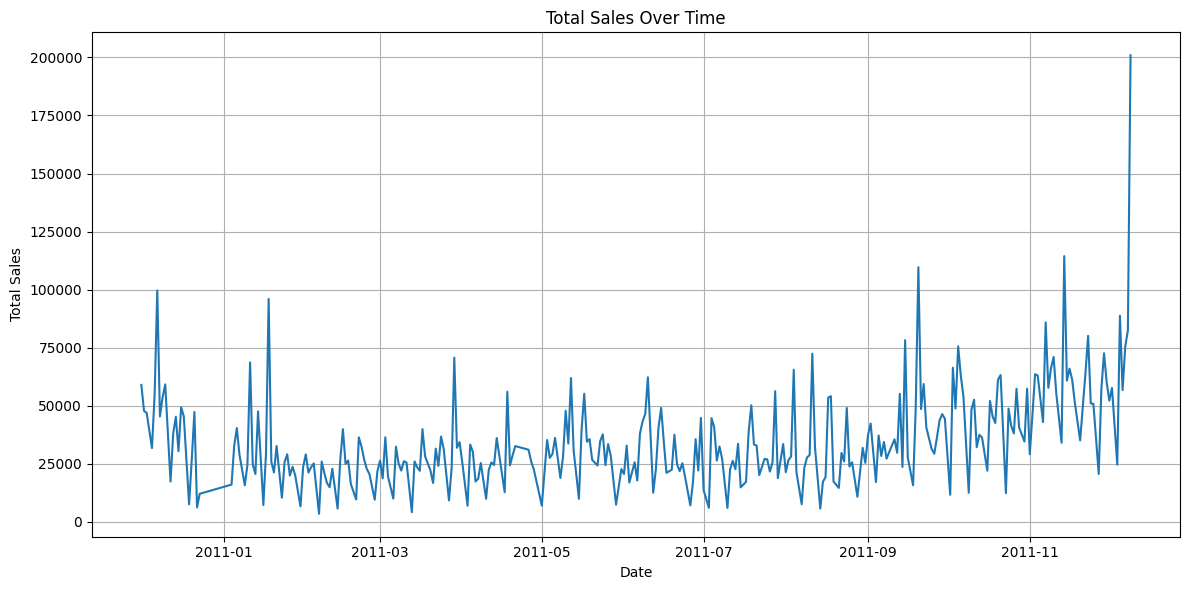

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import os

print("Abhinivesh G - 24BAD001")

# Download the dataset using kagglehub
# This will download the dataset to a temporary location and 'path' will contain the directory
path = kagglehub.dataset_download("carrie1/ecommerce-data")

print(f"Path to dataset files: {path}")

# Construct the full path to the data.csv file within the downloaded directory
data_file_path = os.path.join(path, "data.csv")

# Load the dataset into a pandas DataFrame
df = pd.read_csv(data_file_path, encoding="ISO-8859-1")

# Display the first few rows and information about the DataFrame
print(df.head())
print(df.info())
print(df.isnull().sum())

# Perform data cleaning and transformation
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]

# Plot top 10 products by total sales
top = df.groupby("Description")["TotalSales"].sum().nlargest(10) # Use nlargest for top 10
fig1 = plt.figure(figsize=(12, 6))
top.plot(kind="bar")
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Product Description")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Convert 'InvoiceDate' to datetime and plot total sales over time
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
fig2 = plt.figure(figsize=(12, 6))
df.groupby(df["InvoiceDate"].dt.date)["TotalSales"].sum().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()